In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    
from scipy import stats
import statsmodels.formula.api as sm
import seaborn as sb

In [2]:
data = pd.read_csv('C:/Users/59381/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Missing value, Cleaning data, Change categorial variable

In [4]:
pd.isna(data).values.any()

## Nothing is missing here

data = data.drop(columns=['StandardHours', 'EmployeeCount', 'Over18','EmployeeNumber'])

## All the data has same standard hours, count and over 18 years old, and the EmployeeNumber is 
## obviously a ID, so I will drop them.

data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
data.OverTime.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
data.Gender.replace(to_replace = dict(Male = 1, Female = 0), inplace = True)
data.BusinessTravel.replace(to_replace = dict(Travel_Frequently = 2, Travel_Rarely = 1), 
                            inplace = True)
data.replace(to_replace = 'Non-Travel',value = 0,inplace = True)

data.MaritalStatus.replace(to_replace = dict(Married= 1, Divorced =2),inplace = True)
data.replace(to_replace = 'Single',value = 0,inplace = True)

data.replace(to_replace = 'Sales',value = 0,inplace = True)
data.replace(to_replace = 'Research & Development',value = 1,inplace = True)
data.replace(to_replace = 'Human Resources',value = 2,inplace = True)


## Change the attration to indicators such that we can analysis more convinient
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,2,1005,1,2,2,Life Sciences,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1,1324,1,3,3,Medical,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,0,1,1358,1,24,1,Life Sciences,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,0,2,216,1,23,3,Life Sciences,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,0,1,1299,1,27,3,Medical,3,1,...,3,2,2,17,3,2,7,7,7,7


## Exploratory Data Analysis

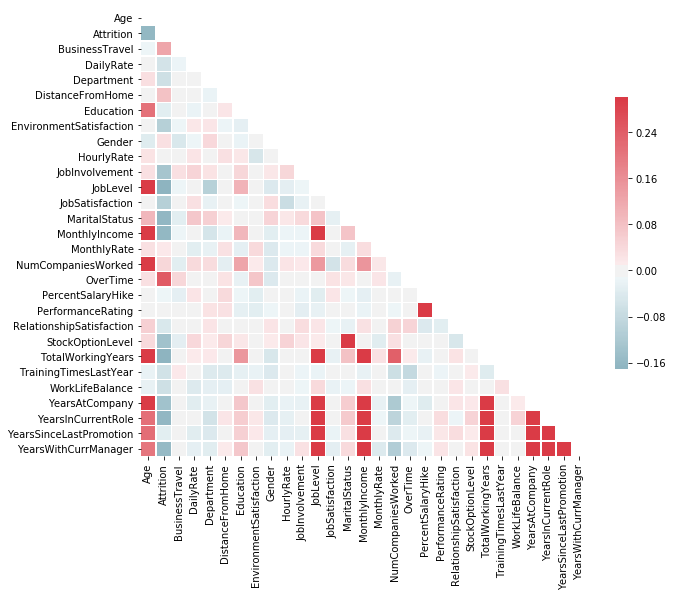

In [5]:
## let us see whether we have any interaction between factors
corr = data.corr()
## Generate mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## generate heat map
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Most of the columns are poorly correlated with other.

We will then see how each factor contribute to the attrition rate

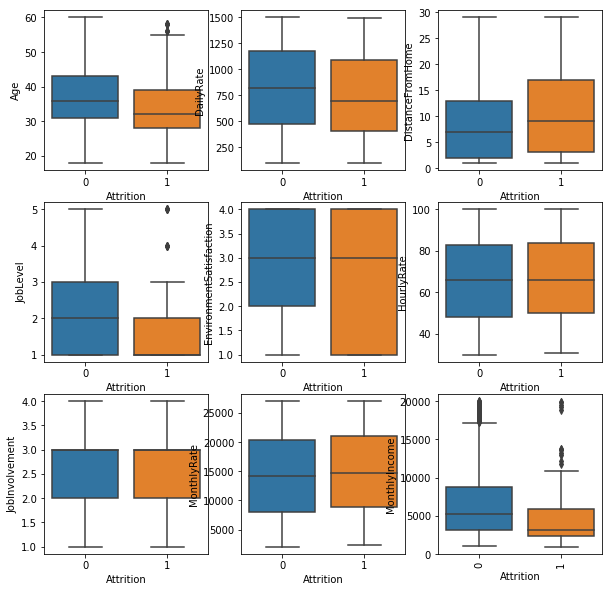

In [6]:
fig,ax = plt.subplots(3,3, figsize=(10,10))                       
sns.boxplot(data['Attrition'], data['Age'], ax = ax[0,0])  
sns.boxplot(data['Attrition'], data['DailyRate'], ax = ax[0,1])  
plt.xticks( rotation=90)
sns.boxplot(data['Attrition'], data['DistanceFromHome'], ax = ax[0,2])      
plt.xticks( rotation=90)

sns.boxplot(data['Attrition'], data['JobLevel'], ax = ax[1,0])  
sns.boxplot(data['Attrition'], data['EnvironmentSatisfaction'], ax = ax[1,1])  
sns.boxplot(data['Attrition'], data['HourlyRate'], ax = ax[1,2])  
sns.boxplot(data['Attrition'], data['JobInvolvement'], ax = ax[2,0])  
sns.boxplot(data['Attrition'], data['MonthlyRate'], ax = ax[2,1]) 
sns.boxplot(data['Attrition'], data['MonthlyIncome'], ax = ax[2,2]) 
plt.show() 

 #### Further Inspection on categorical variables

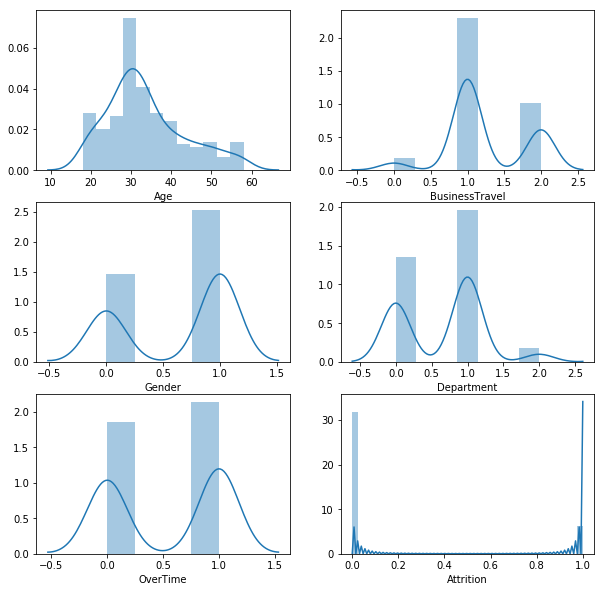

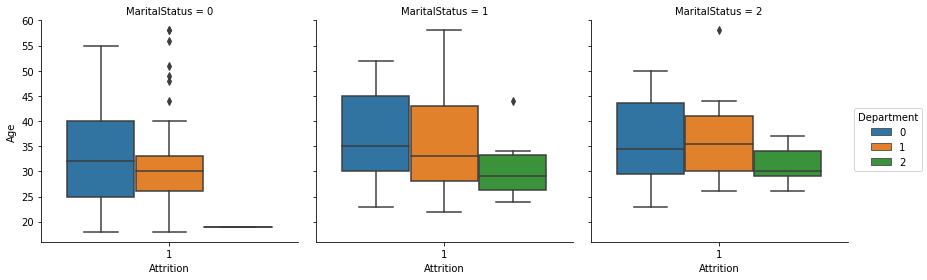

In [7]:
fig, ax4 = plt.subplots(3,2, figsize=(10,10))
attr= data[data.Attrition==1]

sb.distplot(attr.Age,ax = ax4[0,0])

sb.distplot(attr.BusinessTravel,ax = ax4[0,1])
sb.distplot(attr.Gender,ax = ax4[1,0])
sb.distplot(attr.Department,ax = ax4[1,1])

sb.distplot(attr.OverTime,ax = ax4[2,0])
sb.distplot(data.Attrition,ax = ax4[2,1])


plt.show()

sb.factorplot(x =   'Attrition',     
               y =   'Age',          
               hue = 'Department',   
               col = 'MaritalStatus',   
               col_wrap=3,          
               kind = 'box',
               data = attr)
plt.show()



#### Further graph on the influence on numerical variables

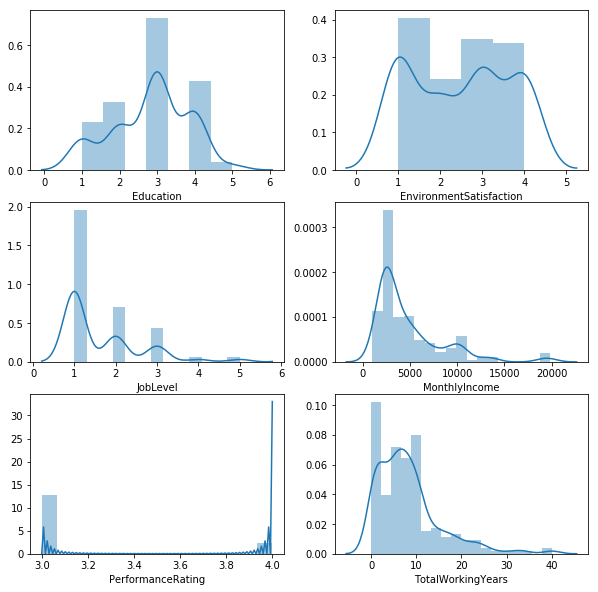

In [8]:
fig, ax4 = plt.subplots(3,2, figsize=(10,10))
attr= data[data.Attrition==1]

sb.distplot(attr.Education,ax = ax4[0,0])

sb.distplot(attr.EnvironmentSatisfaction,ax = ax4[0,1])
sb.distplot(attr.JobLevel,ax = ax4[1,0])
sb.distplot(attr.MonthlyIncome,ax = ax4[1,1])

sb.distplot(attr.PerformanceRating,ax = ax4[2,0])

sb.distplot(attr.TotalWorkingYears,ax = ax4[2,1])
plt.show()


It seems that all these factors have non-linear relation to the attrition rate

Observations: 
1. Elder employee has lower attrition rate.
2. Employee has lower distance from home has lower rate
3. Job level 1 has higher rates
4. Higher montly income employee has lower rate.
5. Attrition is higher during 30-40 age
6. Travel rarely employee has higher rate
7. Research and development department has highest rate

Try to fit a regression model

I want to delete some of the insignificant factors based on our plot, for example, Hourly rate and Monthly Rate.

In [9]:
data = data.drop(columns=['MonthlyRate','HourlyRate','DailyRate',])

## Leave the categorical variable to be discussed later

data1 = data.drop(columns=['EducationField','JobRole',])

## Educational Field and Job Role


In [10]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

data2 = pd.read_csv('C:/Users/59381/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv')
X1 = data1.drop(columns=['Attrition'],)
Y = data1['Attrition']
est = sm.OLS(100*Y,X1)
est2 = est.fit()
print(est2.summary())

C:\Users\59381\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     28.51
Date:                Tue, 27 Nov 2018   Prob (F-statistic):          2.87e-107
Time:                        17:09:04   Log-Likelihood:                -7219.4
No. Observations:                1470   AIC:                         1.449e+04
Df Residuals:                    1445   BIC:                         1.462e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                     

Add the nonlinear factor and delete the insignificant factors.

In [11]:
X1['Agesquare'] = X1['Age']^2
X1['Edusquare'] = X1['Education']^2
X1['JobLevelsquare'] = X1['JobLevel']^2
X1 = X1.drop(columns=['WorkLifeBalance','TrainingTimesLastYear'])

est = sm.OLS(100*Y,X1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     29.61
Date:                Tue, 27 Nov 2018   Prob (F-statistic):          1.53e-114
Time:                        17:09:04   Log-Likelihood:                -7200.0
No. Observations:                1470   AIC:                         1.445e+04
Df Residuals:                    1444   BIC:                         1.459e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                     

Delete more insignificant  terms

In [12]:
X1 = X1.drop(columns=['YearsWithCurrManager','YearsAtCompany'])
est = sm.OLS(100*Y,X1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     31.90
Date:                Tue, 27 Nov 2018   Prob (F-statistic):          2.50e-115
Time:                        17:09:04   Log-Likelihood:                -7201.7
No. Observations:                1470   AIC:                         1.445e+04
Df Residuals:                    1446   BIC:                         1.458e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                     

In [13]:
## Residuals

model_fitted_y = est2.fittedvalues
model_residuals = est2.resid
model_norm_residuals = est2.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

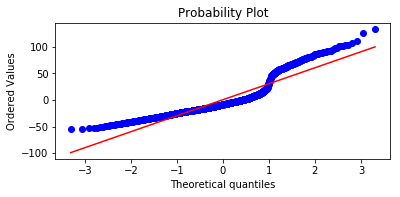

In [14]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model_residuals, plot=ax, fit=True)

Although I delete insignificant factors and add some new factors, the residual plots is not very good. I will try the logistic regression since the predictor Y is categorical. 

In [59]:
train_index = []
test_index = []


length = len(X1)
X1['Attrition'] = Y
for i in range(0, length):
    train_index.append(i) if np.random.rand() <= 0.9 else test_index.append(i)
data_train = X1.iloc[train_index, :]
data_test = X1.iloc[test_index, :]

In [60]:
logi = linear_model.LogisticRegression(C = 1e30)
logi.fit(data_train.drop(['Attrition'], axis = 1), data_train['Attrition'])
result_logi = logi.predict_proba(data_test.drop(['Attrition'], axis = 1))[:, 1]


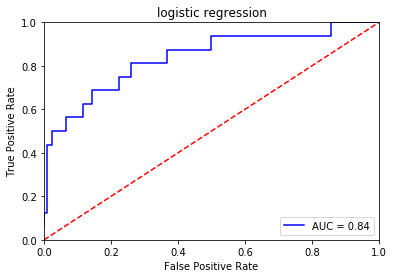

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds= roc_curve(data_test['Attrition'],result_logi)
roc_auc = auc(fpr, tpr)
plt.title('logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

What is the ROC curve like for regresion?

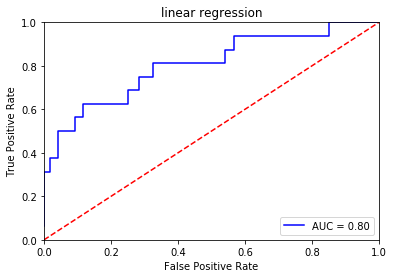

In [62]:
preds = est2.predict(data_test.drop(['Attrition'], axis = 1))/100
fpr1, tpr1, threshold = roc_curve(data_test['Attrition'], preds)
roc_auc1 = auc(fpr1, tpr1)

plt.title('linear regression')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

14      0.634376
23      0.260315
27     -0.002250
34      0.388074
39      0.038642
46      0.240493
55      0.212619
79      0.256091
93      0.297178
108     0.106903
109     0.195859
114     0.022242
119     0.254926
125     0.137135
151     0.025903
154     0.151250
159     0.213433
165     0.070524
166     0.184324
189    -0.052552
194     0.187521
199    -0.022400
246     0.099052
267    -0.098998
272     0.148524
275    -0.135904
295     0.279513
303     0.081144
316     0.340149
318     0.406230
          ...   
1193    0.364580
1194   -0.124639
1202    0.018210
1211    0.045512
1225    0.178803
1260    0.087385
1288   -0.270802
1290    0.098675
1296    0.192626
1300    0.025482
1304    0.078274
1308    0.293233
1309    0.167273
1320    0.087205
1322   -0.164994
1331    0.128747
1345    0.260253
1347    0.173171
1353    0.494944
1360    0.179831
1364    0.314448
1369    0.291941
1376   -0.105723
1387    0.128966
1406    0.298266
1409    0.086938
1420    0.129570
1434   -0.0019